<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/5week/DL_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

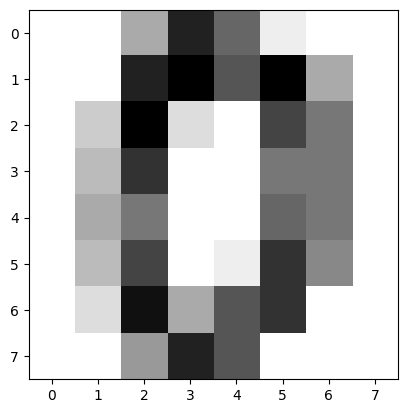

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [20]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
X_scaled = data / 16.0
X_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [22]:
y_categorical = to_categorical(digits.target, num_classes=10)
y_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)
X_train

array([[0.    , 0.    , 0.1875, ..., 0.8125, 0.25  , 0.    ],
       [0.    , 0.    , 0.5625, ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]])

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [25]:
# 딥러닝 모델 설계
model = Sequential([
    Dense(128, activation='relu', input_shape=(64,)), # 입력층
    Dense(64, activation='relu'),                     # 은닉층
    Dense(10, activation='softmax')                   # 출력층 (0~9까지 10개 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
print("Starting model training...")
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
print("Training finished.")


Starting model training...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3857 - loss: 2.0708
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8538 - loss: 0.9800
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9343 - loss: 0.3865
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9470 - loss: 0.2495
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9667 - loss: 0.1648
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9785 - loss: 0.1273
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.1258
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0949
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0735
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0732
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0704
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9895 - loss: 0.0592


In [26]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nDeep Learning Model Accuracy: {accuracy:.4f}")


Deep Learning Model Accuracy: 0.9750


In [27]:
# 테스트 이미지 중 하나를 사용하여 예측 확인
# 모델 예측 (결과는 확률 분포)
predictions = model.predict(X_test)
# 가장 높은 확률을 가진 클래스의 인덱스를 찾음
predicted_class = np.argmax(predictions[10])
true_class = np.argmax(y_test[10])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


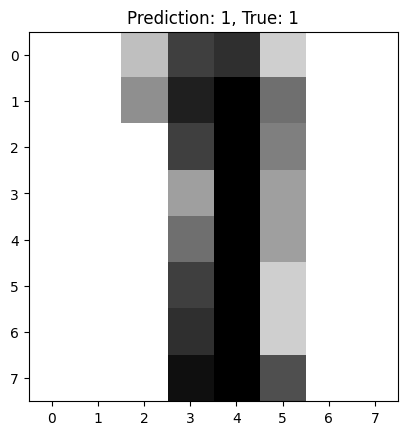

In [28]:
# 시각화
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Prediction: {predicted_class}, True: {true_class}")
plt.show()